In [2]:
!pip install ultralytics
!pip install -U ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 18.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 55.3 MB/s eta 0:00:00:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are inst


0: 640x640 34 persons, 1524.1ms
Speed: 3.2ms preprocess, 1524.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


/tmp/ipykernel_30/2177696698.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  conf = float(box.conf.cpu().numpy())  # Extract confidence as a scalar


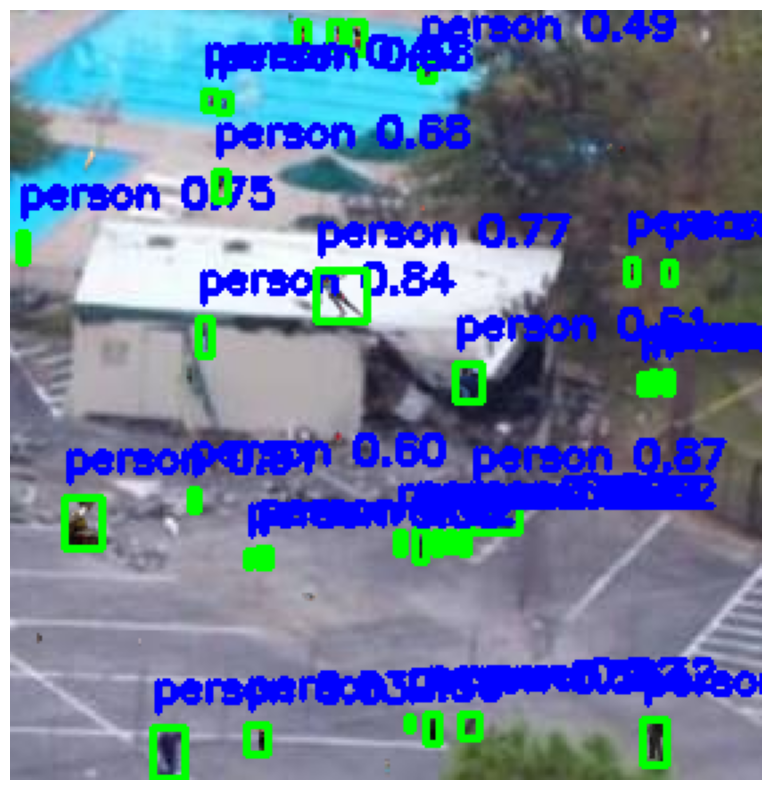

In [11]:
import torch
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load YOLO model
# model = YOLO('yolov9c.pt')
model = YOLO('/kaggle/input/new-model/yolov9c.pt')

# model.load_state_dict(torch.load('/kaggle/input/new-model/yolov9c.pt')['model'], strict  = False)


def detect_and_plot_bounding_box(image_path):
    # Load image
    img = cv2.imread(image_path)
    
    # Perform inference using YOLO model
    results = model(img)

    # Extract bounding box coordinates, confidence, and class labels
    for result in results:  # Loop through the detected objects
        boxes = result.boxes  # Access boxes from result
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Get bounding box coordinates
            conf = float(box.conf.cpu().numpy())  # Extract confidence as a scalar
            cls = int(box.cls.cpu().numpy().item())  # Extract class index as a scalar
            
            # Draw rectangle around detected object
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            label = f'{model.names[cls]} {conf:.2f}'  # Add label with class name and confidence
            cv2.putText(img, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Convert BGR image to RGB for display using Matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

detect_and_plot_bounding_box('/kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/train/images/collapsed_building_image0001_0.png')
